## Mobile Phone Pricing Classification

#### Working progress - Using XGBoost

In [1]:
#Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Get the data
df = pd.read_csv('train.csv')
pd.set_option("display.max_columns", 50)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
## Drop duplicates
df = df.drop_duplicates(keep= 'first')

## Check the shape 
df.shape


(2000, 21)

In [4]:
## Check the info 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 343.8 KB


In [5]:
## Check the stats
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


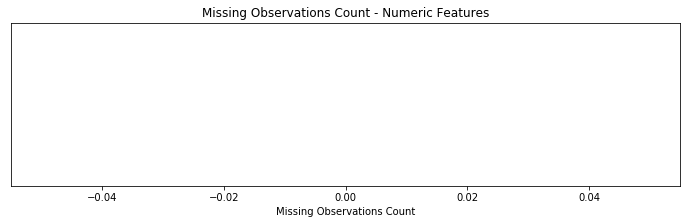

In [6]:
missing_values = df.isnull().sum(axis=0).reset_index()
missing_values.columns = ['column_name', 'missing_count']
missing_values = missing_values.loc[missing_values['missing_count']>0]
missing_values = missing_values.sort_values(by='missing_count')

ind = np.arange(missing_values.shape[0])
width = 0.1
fig, ax = plt.subplots(figsize=(12,3))
rects = ax.barh(ind, missing_values.missing_count.values, color='b')
ax.set_yticks(ind)
ax.set_yticklabels(missing_values.column_name.values, rotation='horizontal')
ax.set_xlabel("Missing Observations Count")
ax.set_title("Missing Observations Count - Numeric Features")
plt.show()

In [7]:
## Find how many unique values
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

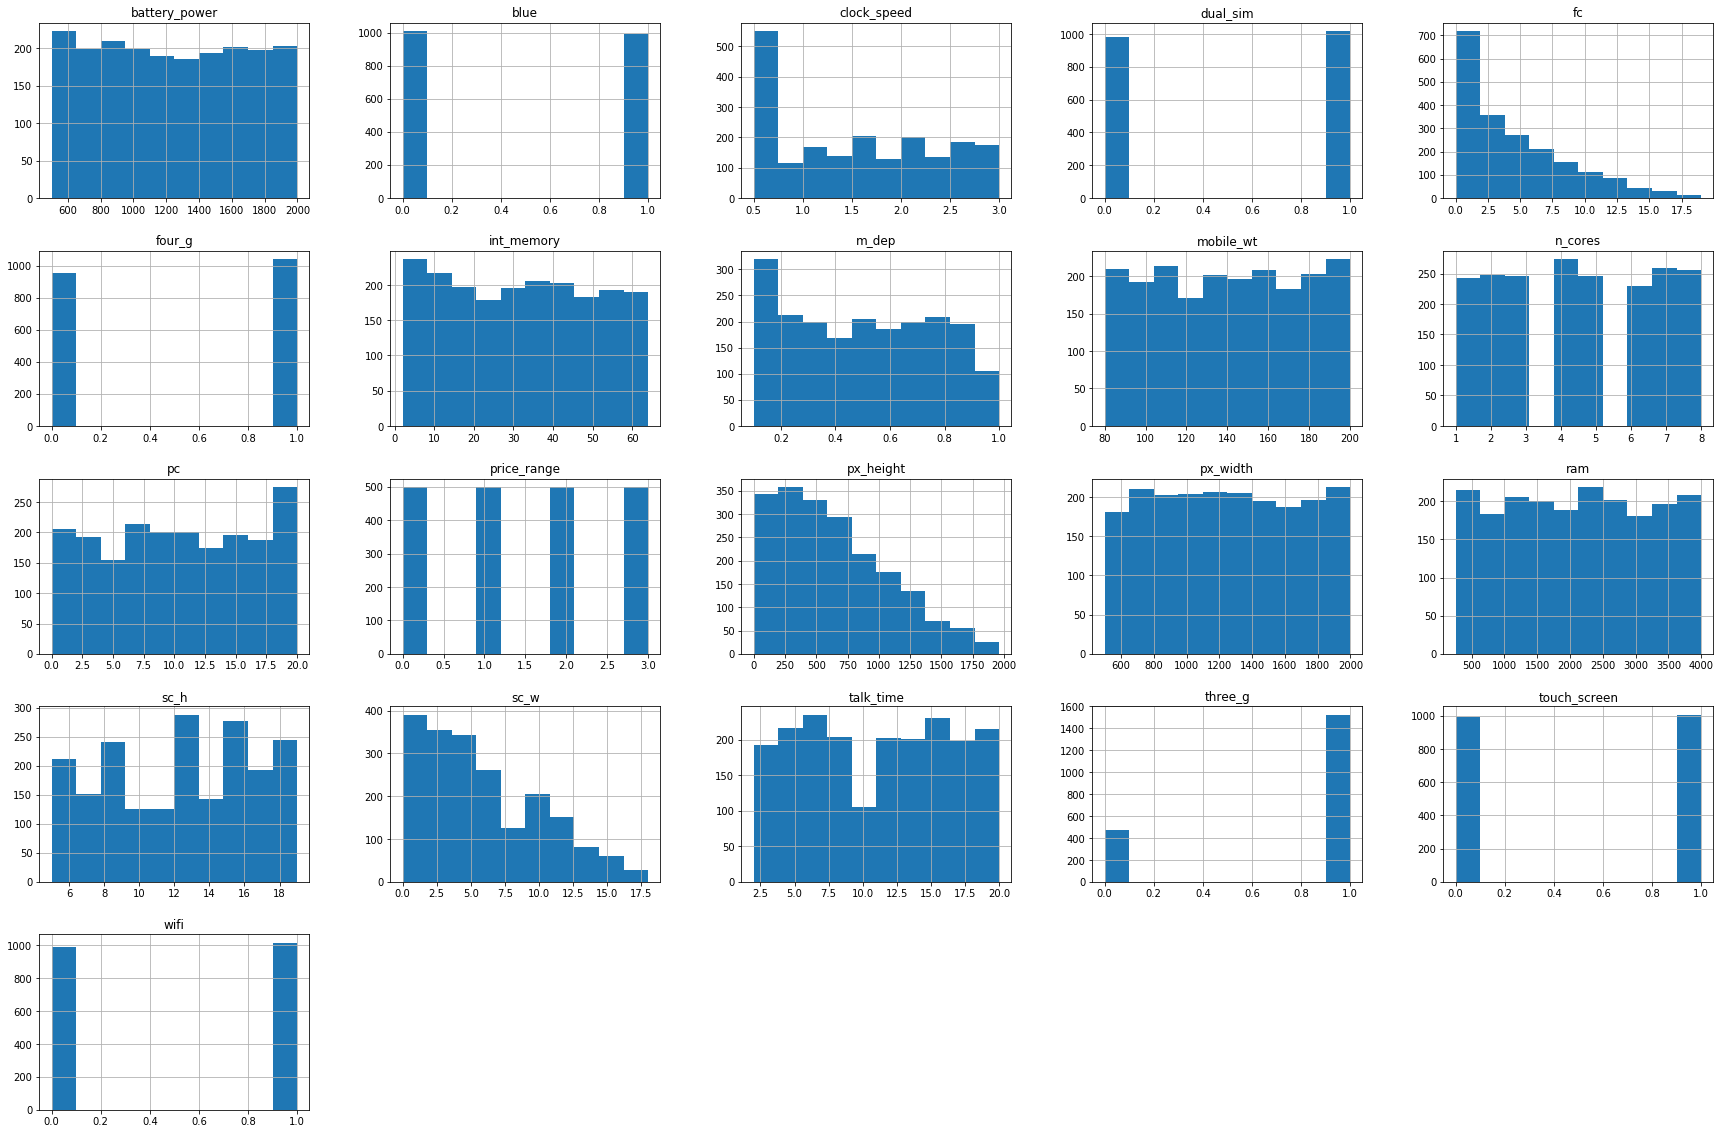

In [8]:
hist = df.hist(figsize=[30,20])

As the price appears in 4 ranges, convert the price range into 2 - "Expensive and Less Expensive"

In [9]:
#Pre-Process Data

df['price_range'] = np.where(df['price_range']>= 2,1,0)


In [10]:
df.price_range.head()

0    0
1    1
2    1
3    1
4    0
Name: price_range, dtype: int32

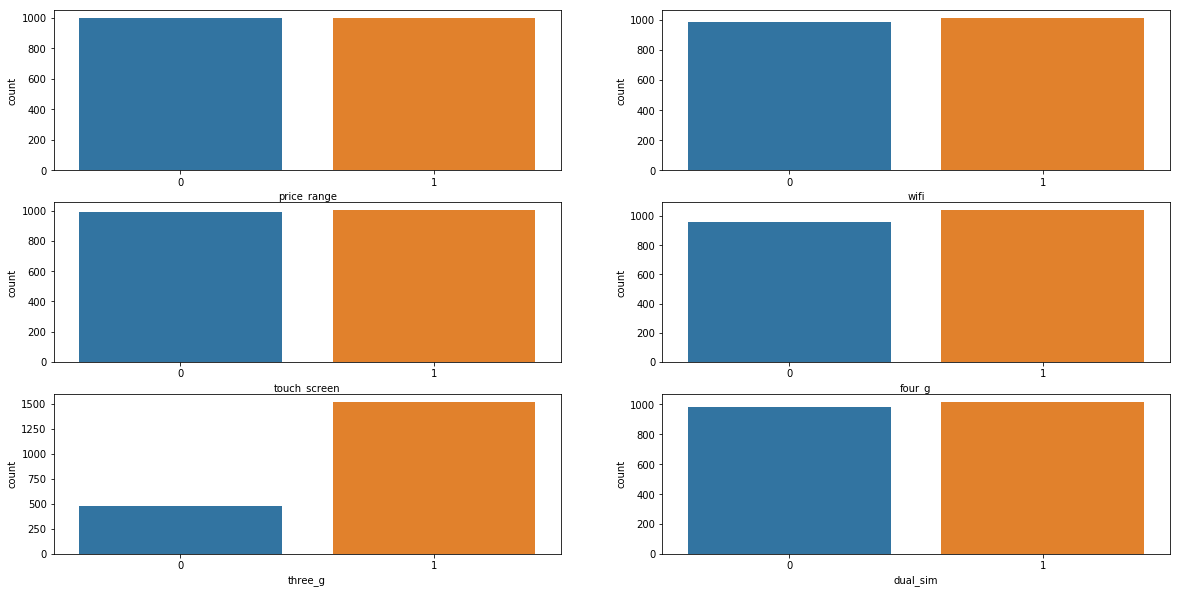

In [11]:
## Visual to see many count plots at once

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20,10))
sns.countplot(df['price_range'], ax=ax[0,0])
sns.countplot(df['wifi'], ax=ax[0,1])
sns.countplot(df['touch_screen'], ax=ax[1,0])
sns.countplot(df['four_g'], ax=ax[1,1])
sns.countplot(df['three_g'], ax=ax[2,0])
sns.countplot(df['dual_sim'], ax=ax[2,1])

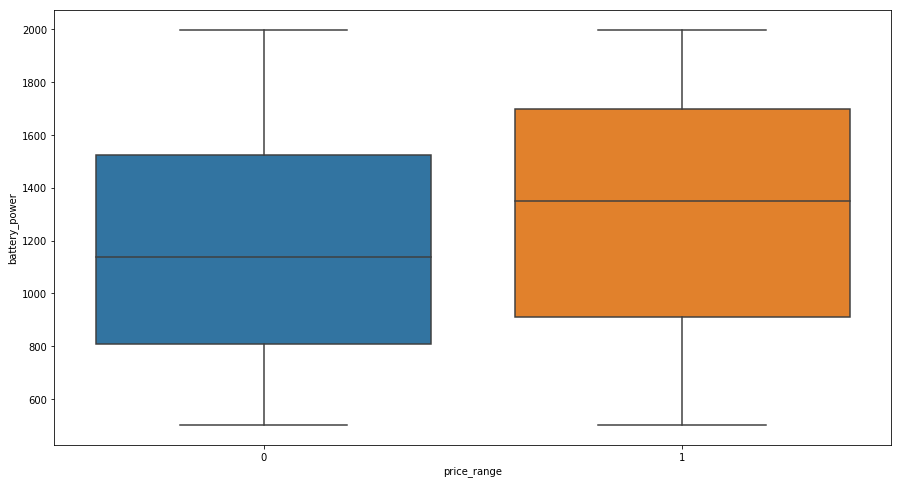

In [12]:
## Box plot - how battery power influences price

plt.figure(figsize=(15,8))
sns.boxplot(x="price_range", y="battery_power", data=df)
plt.show()

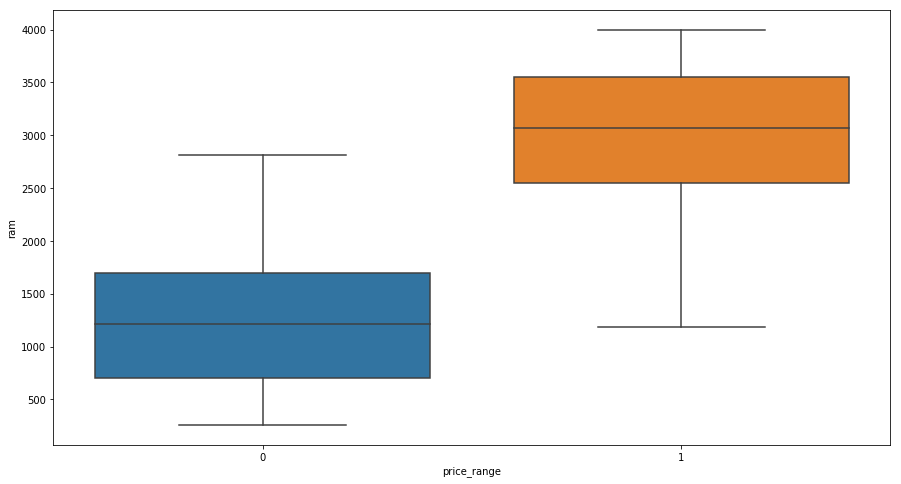

In [13]:
## Box plot - How ram influences price

plt.figure(figsize=(15,8))
sns.boxplot(x="price_range", y="ram", data=df)
plt.show()

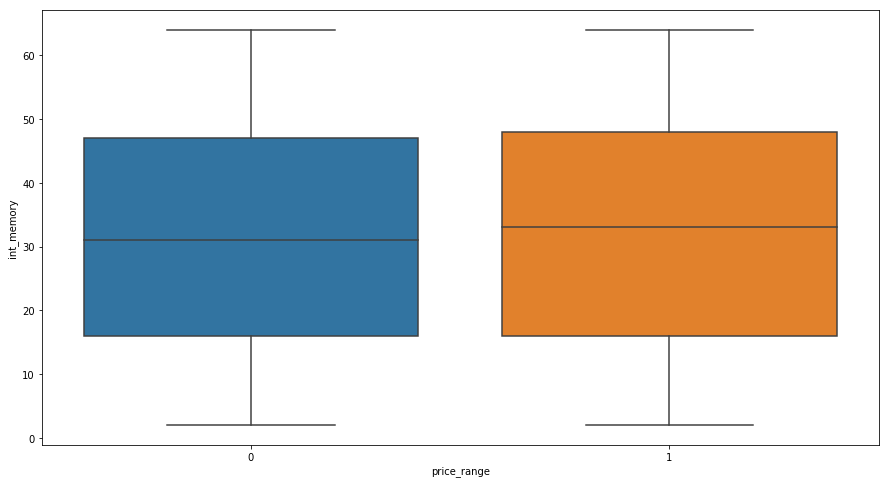

In [14]:
## Box plot - How internal memory influences price

plt.figure(figsize=(15,8))
sns.boxplot(x="price_range", y="int_memory", data=df)
plt.show()

In [15]:
## See isolated correlation against target

correlation = df.drop('price_range', axis=1).apply(lambda x: x.corr(df.price_range))
print(correlation.sort_values(ascending=False))

ram              0.822354
battery_power    0.149402
px_width         0.116703
px_height        0.097951
sc_w             0.035359
n_cores          0.031260
pc               0.027628
three_g          0.024638
fc               0.022464
int_memory       0.022132
wifi             0.014001
blue             0.014001
sc_h             0.009140
dual_sim         0.009002
talk_time        0.004394
clock_speed      0.003494
four_g           0.001001
mobile_wt       -0.007968
m_dep           -0.018554
touch_screen    -0.040001
dtype: float64


In [16]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

y_train = train['price_range']
X_train = train[['ram', 'battery_power']]
y_test = test['price_range']
X_test = test[['ram', 'battery_power']]

In [17]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [18]:
model = xgb.XGBClassifier()
train_model = model.fit(X_train, y_train)


In [19]:
#Let's use accuracy score
from sklearn.metrics import accuracy_score

pred = train_model.predict(X_test)
print("Accuracy for XGBoost model: %.2f" % (accuracy_score(y_test, pred) * 100))


Accuracy for XGBoost model: 94.50


In [20]:
print("Ram range is: ", df.ram.min(),"-", df.ram.max())
print("Battery power range is: ", df.battery_power.min(),"-", df.battery_power.max())


Ram range is:  256 - 3998
Battery power range is:  501 - 1998
